In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solarpy.radiation as spr
import solarpy.utils as spu

# Beam irradiance on a normal plane

Irradiance during the day on a plane always perpendicular to the solar beam, on November 12 at the latitude 12 degrees north, for different altitudes:

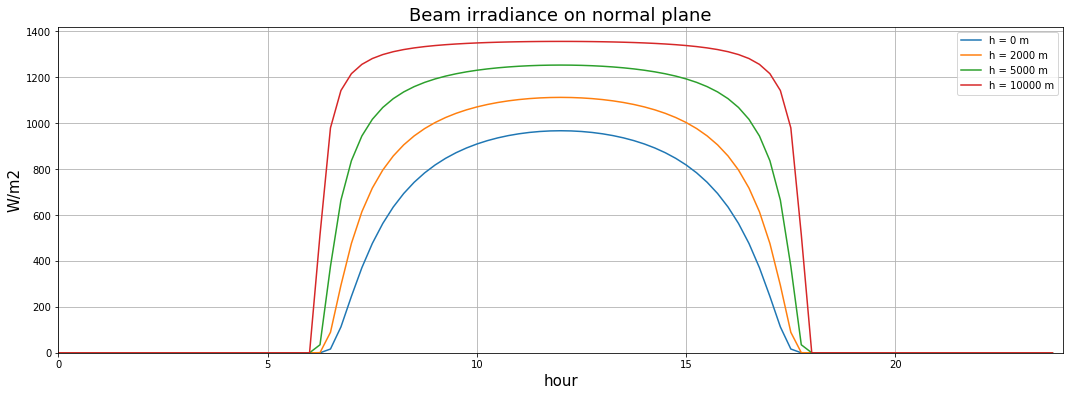

In [2]:
n = spu.day_of_the_year(11, 12)  # November 12
lat = 12  # north hemisphere

plt.figure(figsize=(18, 6))

for h in (0, 2e3, 5e3, 10e3):
    G = []
    t = np.arange(0, 24, 0.25)
    for hour in range(0, 24):
        for minute in (0, 15, 30, 45):
            G.append(spr.beam_irradiance(h, n, lat, hour, minute))
    plt.plot(t, G, label='h = ' + str(int(h)) + ' m')
    
plt.xlim(0, 24), plt.ylim(0, 1420)
plt.xlabel('hour', fontsize=15)
plt.ylabel('W/m2', fontsize=15)
plt.title('Beam irradiance on normal plane', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

# Irradiance on a fixed plane

Irradiance during different days on a fixed plane defined by its normal vector, at the latitude 52 degrees north at an altitude of 10km:

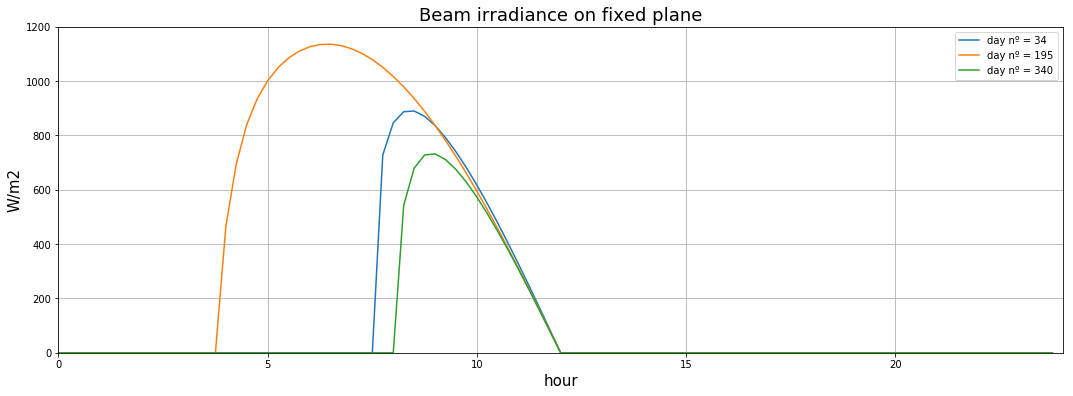

In [3]:
vnorm = np.array([0, 1, 0])  # plane pointing eastwards

n1 = spu.day_of_the_year(2, 3)  # February 3
n2 = spu.day_of_the_year(7, 14)  # July 14
n3 = spu.day_of_the_year(12, 6)  # December 6

lat = 52  # north hemisphere
h = 10e3

plt.figure(figsize=(18, 6))

for n in (n1, n2, n3):
    G = []
    t = np.arange(0, 24, 0.25)
    for hour in range(0, 24):
        for minute in (0, 15, 30, 45):
            G.append(spr.irradiance_on_plane(vnorm, h, n, lat, hour, minute))
    plt.plot(t, G, label='day nº = ' + str(n))

plt.xlim(0, 24), plt.ylim(0, 1200)
plt.xlabel('hour', fontsize=15)
plt.ylabel('W/m2', fontsize=15)
plt.title('Beam irradiance on fixed plane', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()